### Sommaire

* [Intro: importation et nettoyage des données](#chapter1)
* [Partie 1: Analyse du CA](#chapter2)
* [Partie 2: les références](#chapter3)
    * [Les Tops](#section_3_1)
    * [Les Flops](#section_3_2)
    * [La répartition des ventes par catégorie](#section_3_3)
* [Partie 3: les profils de nos clients](#chapter4)
    * [Répartition par genre](#section_4_1)
    * [Répartition par tranche d'âge](#section_4_2)
    * [Répartition du CA via une Courbe de Lorenz](#section_4_3)
* [Partie 4: le comportement de nos clients](#chapter5)
    * [le lien entre le genre d’un client et les catégories des livres achetés](#section_5_1)
    * [le lien entre l’âge des clients et le montant total des achats](#section_5_2)
    * [le lien entre l’âge des clients et la fréquence d’achat](#section_5_3)
    * [le lien entre l’âge des clients et la taille du panier moyen](#section_5_4)
    * [le lien entre l’âge des clients et les catégories des livres achetés](#section_5_5)
    

# Intro: importation et nettoyage des données <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

Méthode:
- importation, visualisation premières lignes, nb de lignes, de colonnes.
- vérification des types
- les valeurs manquantes
- les doublons
- les outliers

In [2]:
#import et visu
products = pd.read_csv('products.csv')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [3]:
#taille du df
products.shape

(3287, 3)

In [4]:
#types
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

categ est de type entier alors que variable qualitative. Je vais la modifier pour éviter quiproquo par la suite.

In [5]:
#quelles valeurs prend 'categ'?
products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
#remplacement des valeurs 0, 1, 2 par des valeurs plus parlantes
products.loc[products['categ']== 0, 'categ']='categ_0'
products.loc[products['categ']== 1, 'categ']='categ_1'
products.loc[products['categ']== 2, 'categ']='categ_2'

In [7]:
#valeurs manquantes?
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [8]:
products.describe(include = 'all')

,id_prod,price,categ
count,3287,3287.000000,3287
unique,3287,NaN,3
top,0_1421,NaN,categ_0
freq,1,NaN,2309
mean,NaN,21.856641,NaN
std,NaN,29.847908,NaN
min,NaN,-1.000000,NaN
25%,NaN,6.990000,NaN
50%,NaN,13.060000,NaN
75%,NaN,22.990000,NaN


id_prod: clé primaire

on voit qu'il y a un prix négatif, valeur atypique!

In [9]:
#quels produits à un prix négatif?
products.loc[products['price']<0]

,id_prod,price,categ
731,T_0,-1.0,categ_0


==> à garder en mémoire pour action

les données **products**:
- id_prod: clé primaire
- price: prix unitaire
- categ: catégorie du produit, peut valoir categ_0, categ_1 ou categ_2

In [10]:
#import et visu
customers = pd.read_csv('customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [11]:
#taille
customers.shape

(8623, 3)

In [12]:
#types des variables
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [13]:
#valeurs manquantes?
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [14]:
customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


client_id : clé primaire

les données **customers**:
- client_id: clé primaire
- sex: genre du client
- birth: année de naissance

In [15]:
#import et visu
transactions = pd.read_csv('transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [16]:
#taille du df
transactions.shape

(679532, 4)

In [17]:
#types des variables
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

type de 'date' à changer

In [18]:
#valeurs manquantes?
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [19]:
transactions.describe(include = 'all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


La variable 'date' affiche une (des) valeurs qui sont atypiques.

In [20]:
transactions.loc[transactions['session_id']=='s_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Je regarde de plus près T_0, les client_id associés

In [21]:
products.loc[products['id_prod']=='T_0']

,id_prod,price,categ
731,T_0,-1.0,categ_0


on retrouve le produit à prix négatif

In [22]:
#pour connaitre les differentes valeurs de client_id sur ces 200 lignes
transactions.loc[transactions['session_id']=='s_0']['client_id'].unique()

array(['ct_0', 'ct_1'], dtype=object)

In [23]:
customers.loc[(customers['client_id']=='ct_0') | (customers['client_id']=='ct_1')]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


Toutes les transactions ont été effectuées le même jour , à la même heure sur le même produit, avec 2 clients. Je pense que ce sont des tests. Je vais donc exclure ces données 'test' de mon analyse en créant un nouveau df 'transac'.

In [24]:
#nouveau df qui exclut les transactions "test"
transac = transactions.loc[transactions['session_id']!='s_0'].reset_index()
transac.head()

,index,id_prod,date,session_id,client_id
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


une ligne par achat d'un produit pour un client sur une session. donc autant de ligne de produits achetés sur une session par un client. ==> clé [session,client]

In [25]:
transac.describe()

,index
count,679332.000000
mean,339765.256134
std,196166.053457
min,0.000000
25%,169877.750000
50%,339769.500000
75%,509652.250000
max,679531.000000


In [26]:
#Forçage au type date
transac['date_session'] = pd.to_datetime(transac['date'], format='%Y-%m-%d %H:%M:%S')
#vérification
transac.dtypes

index                    int64
id_prod                 object
date                    object
session_id              object
client_id               object
date_session    datetime64[ns]
dtype: object

In [27]:
#suppression des colonnes maintenant inutiles
transac=transac.drop(columns=['date', 'index'])
transac.head()

,id_prod,session_id,client_id,date_session
0,0_1518,s_211425,c_103,2022-05-20 13:21:29.043970
1,1_251,s_158752,c_8534,2022-02-02 07:55:19.149409
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33.155329
3,2_209,s_52962,c_6941,2021-06-24 04:19:29.835891
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08.194479


In [28]:
transac.describe(include='all', datetime_is_numeric=True)

,id_prod,session_id,client_id,date_session
count,679332,679332,679332,679332
unique,3266,342315,8600,NaN
top,1_369,s_118668,c_1609,NaN
freq,2252,14,25488,NaN
mean,NaN,NaN,NaN,2022-03-03 15:13:19.307389696
min,NaN,NaN,NaN,2021-03-01 00:01:07.843138
25%,NaN,NaN,NaN,2021-09-08 09:14:25.055994368
50%,NaN,NaN,NaN,2022-03-03 07:50:20.817730560
75%,NaN,NaN,NaN,2022-08-30 23:57:08.555173888
max,NaN,NaN,NaN,2023-02-28 23:58:30.792755


les données **transac**:
- id_prod: cle étrangère
- session_id: 
- client_id: clé étrangère
- date_session
- session_id + client_id: clé primaire

Il nous faut connaître le montant des transactions, en fusionnant les df transac et products

In [29]:
#ajout des infos du produit (prix et categ) pour chaque ligne de transactions du df transac par une fusion gauche
transac_price=pd.merge(transac, products, on='id_prod', how='left')
transac_price.head()

,id_prod,session_id,client_id,date_session,price,categ
0,0_1518,s_211425,c_103,2022-05-20 13:21:29.043970,4.18,categ_0
1,1_251,s_158752,c_8534,2022-02-02 07:55:19.149409,15.99,categ_1
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33.155329,7.99,categ_0
3,2_209,s_52962,c_6941,2021-06-24 04:19:29.835891,69.99,categ_2
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08.194479,4.99,categ_0


In [30]:
#tous les produits vendus ont-ils un prix?
transac_price[transac_price['price'].isna()]

,id_prod,session_id,client_id,date_session,price,categ
2633,0_2245,s_272266,c_4746,2022-09-23 07:22:38.636773,NaN,NaN
10103,0_2245,s_242482,c_6713,2022-07-23 09:24:14.133889,NaN,NaN
11723,0_2245,s_306338,c_5108,2022-12-03 03:26:35.696673,NaN,NaN
15670,0_2245,s_76493,c_1391,2021-08-16 11:33:25.481411,NaN,NaN
16372,0_2245,s_239078,c_7954,2022-07-16 05:53:01.627491,NaN,NaN
...,...,...,...,...,...,...
669533,0_2245,s_80395,c_131,2021-08-25 09:06:03.504061,NaN,NaN
670484,0_2245,s_175311,c_4167,2022-03-06 19:59:19.462288,NaN,NaN
671088,0_2245,s_209381,c_4453,2022-05-16 11:35:20.319501,NaN,NaN
675480,0_2245,s_163405,c_1098,2022-02-11 09:05:43.952857,NaN,NaN


In [31]:
#quelles sont les produits sans prix?
transac_price[transac_price['price'].isna()]['id_prod'].unique()

array(['0_2245'], dtype=object)

Un seul produit concerné, qui a été vendu 221 fois, on ne peut exclure cet article et les transactions associées. Je vais 
 - estimer son prix comme étant la moyenne des prix des produits.
 - déterminer sa categorie d'après son id qui commence par zéro ce qui indique sa catégorie

In [32]:
#remplacement des valeurs manquantes par la moyenne des prix des produits et catégorie à zéro
transac_price.loc[transac_price['price'].isna(), 'price']=transac_price['price'].mean()
transac_price.loc[transac_price['categ'].isna(), 'categ']='categ_0'
transac_price[transac_price['price'].isna()]

,id_prod,session_id,client_id,date_session,price,categ


Vérification: Plus aucune transaction sans prix.

In [33]:
transac_price.loc[transac_price['id_prod']=='0_2245']

,id_prod,session_id,client_id,date_session,price,categ
2633,0_2245,s_272266,c_4746,2022-09-23 07:22:38.636773,17.454773,categ_0
10103,0_2245,s_242482,c_6713,2022-07-23 09:24:14.133889,17.454773,categ_0
11723,0_2245,s_306338,c_5108,2022-12-03 03:26:35.696673,17.454773,categ_0
15670,0_2245,s_76493,c_1391,2021-08-16 11:33:25.481411,17.454773,categ_0
16372,0_2245,s_239078,c_7954,2022-07-16 05:53:01.627491,17.454773,categ_0
...,...,...,...,...,...,...
669533,0_2245,s_80395,c_131,2021-08-25 09:06:03.504061,17.454773,categ_0
670484,0_2245,s_175311,c_4167,2022-03-06 19:59:19.462288,17.454773,categ_0
671088,0_2245,s_209381,c_4453,2022-05-16 11:35:20.319501,17.454773,categ_0
675480,0_2245,s_163405,c_1098,2022-02-11 09:05:43.952857,17.454773,categ_0


# PARTIE 1: Indicateurs et graphes autour du chiffre d'affaire <a class="anchor" id="chapter2"></a>

On veut visualiser l'évolution du CA dans le temps, dans un 1er temps par mois.

In [34]:
# création nouvelle colonne mois de la session
transac_price['mois_session']= transac_price['date_session'].dt.strftime('%Y-%m')

In [35]:
#pour obtenir le CA par mois, j'effectue une agregation
CA_mensuel = transac_price.groupby(transac_price['mois_session'])['price'].sum().reset_index(name='CA')
CA_mensuel.head()

,mois_session,CA
0,2021-03,482597.702961
1,2021-04,476353.666829
2,2021-05,493083.108188
3,2021-06,484210.743414
4,2021-07,482905.219094


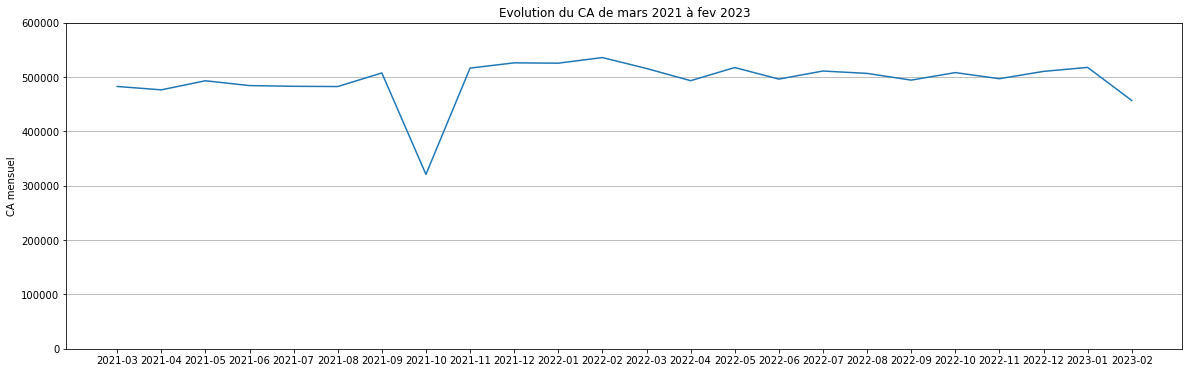

In [36]:
#le graphe d'évolution du CA mois par mois
plt.figure(figsize=(20,6))
plt.plot(CA_mensuel['mois_session'],CA_mensuel['CA'] )
plt.yticks([0,100000,200000,300000,400000, 500000, 600000])
plt.grid(axis='y')
plt.ylabel('CA mensuel')
plt.title('Evolution du CA de mars 2021 à fev 2023')
plt.show()

Chute du CA en oct 2021 ==> à analyser

Zoom sur les evenements d'octobre 2021. Visualisation du CA hebdo

In [37]:
# création nouvelle colonne semaine de la session
transac_price['semaine_session']= transac_price['date_session'].dt.strftime('%Y-%W')
#agregation sur la semaine du CA réalisé
CA_hebdo = transac_price.groupby(transac_price['semaine_session'])['price'].sum().reset_index(name='CA')
CA_hebdo.head()

,semaine_session,CA
0,2021-09,110515.644320
1,2021-10,105693.240000
2,2021-11,112059.080000
3,2021-12,109493.434320
4,2021-13,107982.933867


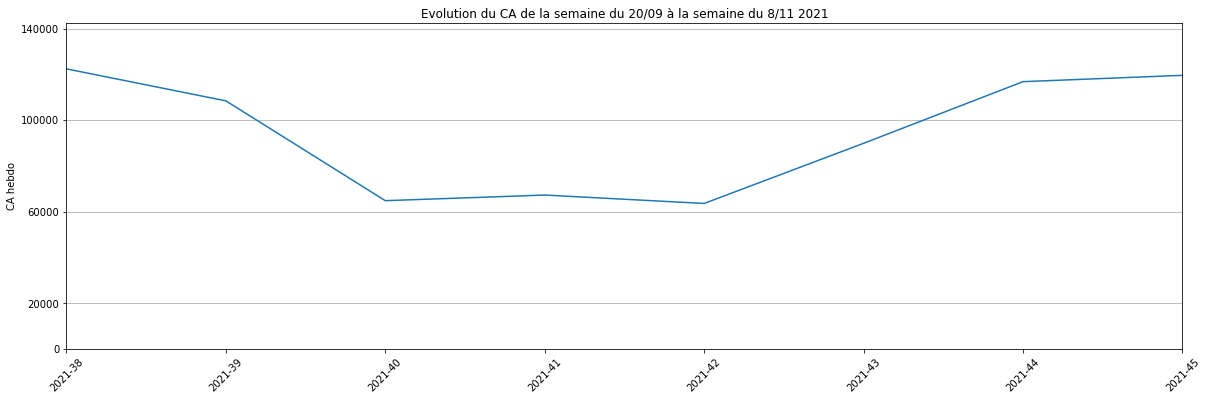

In [38]:
#visualisation du CA hebdo de fin sept à debut nov 2021
plt.figure(figsize=(20,6))
plt.plot(CA_hebdo['semaine_session'],CA_hebdo['CA'] )
plt.yticks([0,20000,60000,100000,140000])
plt.xticks(rotation=45)
plt.xlim('2021-38', '2021-45')
plt.grid(axis='y')
plt.ylabel('CA hebdo')
plt.title('Evolution du CA de la semaine du 20/09 à la semaine du 8/11 2021')
plt.show()

Je continue à zoomer à la journée. et si rien de visible alors pb sur les produits

In [39]:
# création nouvelle colonne jour de la session
transac_price['jour_session']= transac_price['date_session'].dt.strftime('%Y-%m-%d')
#agregation sur la journée du CA réalisé
CA_jour = transac_price.groupby(transac_price['jour_session'])['price'].sum().reset_index(name='CA')
CA_jour.head()

,jour_session,CA
0,2021-03-01,16582.674773
1,2021-03-02,15503.904773
2,2021-03-03,15198.690000
3,2021-03-04,15196.070000
4,2021-03-05,17471.370000


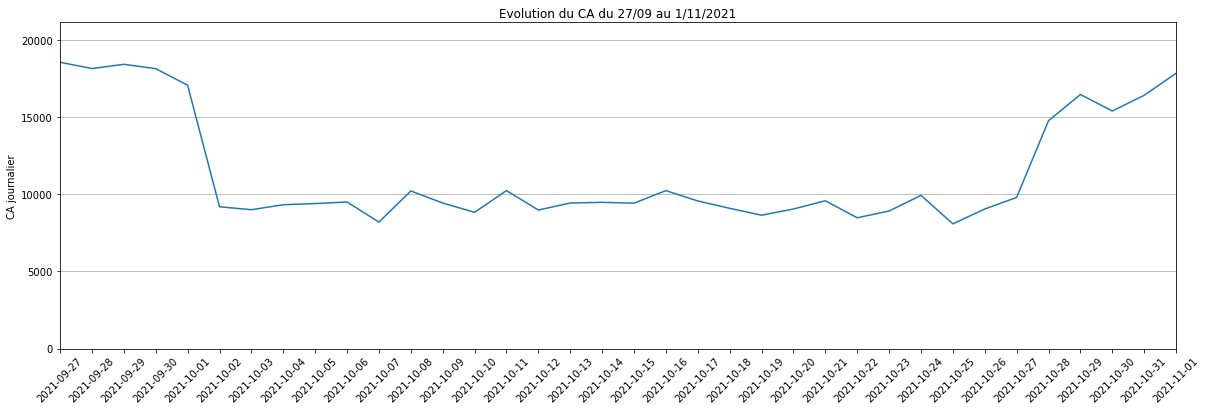

In [40]:
#visualisation du CA journalier de S40 à S42
plt.figure(figsize=(20,6))
plt.plot(CA_jour['jour_session'],CA_jour['CA'] )
plt.yticks([0,5000,10000,15000,20000])
plt.xticks(rotation=45)
plt.xlim('2021-09-27', '2021-11-01')
plt.grid(axis='y')
plt.ylabel('CA journalier')
plt.title('Evolution du CA du 27/09 au 1/11/2021')
plt.show()

La baisse des ventes en CA est sur toute une période allant du 01/10 au 26/10 inclus. Je regarde comment sont répartis les produits par catégorie sur cette période.

In [41]:
#nb des ventes journalières par catégorie par un groupby
vente_jour_categ = transac_price.groupby(['jour_session', 'categ'])['categ'].agg('count').reset_index(name ='count')
vente_jour_categ.head()

,jour_session,categ,count
0,2021-03-01,categ_0,582
1,2021-03-01,categ_1,335
2,2021-03-01,categ_2,46
3,2021-03-02,categ_0,621
4,2021-03-02,categ_1,276


In [42]:
#pour chaque journée, par catégorie (colonnes), calcul du nb de produits
table_vente_categ=vente_jour_categ.pivot_table(index='jour_session', columns='categ', values ='count', aggfunc='sum').reset_index()
table_vente_categ.head()

categ,jour_session,categ_0,categ_1,categ_2
0,2021-03-01,582.0,335.0,46.0
1,2021-03-02,621.0,276.0,43.0
2,2021-03-03,591.0,280.0,40.0
3,2021-03-04,563.0,297.0,43.0
4,2021-03-05,561.0,331.0,51.0


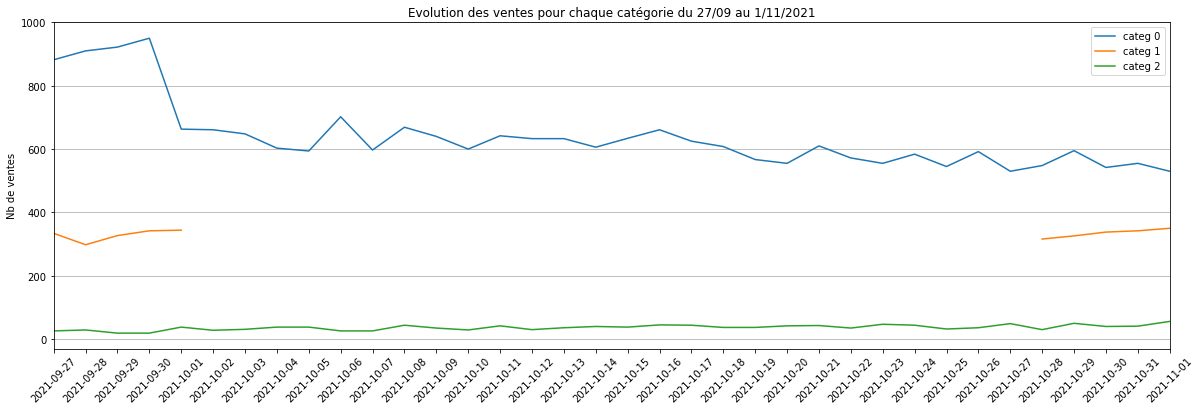

In [43]:
#visualisation des ventes de chaque catégorie via 3 courbes
plt.figure(figsize=(20,6))
plt.plot(table_vente_categ['jour_session'],table_vente_categ['categ_0'], label ='categ 0')
plt.plot(table_vente_categ['jour_session'],table_vente_categ['categ_1'], label ='categ 1')
plt.plot(table_vente_categ['jour_session'],table_vente_categ['categ_2'], label ='categ 2')
plt.yticks([0, 200, 400, 600, 800, 1000])
plt.xticks(rotation=45)
plt.xlim('2021-09-27', '2021-11-01')
plt.grid(axis='y')
plt.ylabel('Nb de ventes')
plt.legend()
plt.title('Evolution des ventes pour chaque catégorie du 27/09 au 1/11/2021')
plt.show()

Aucun produit de la catégorie 1 du 1er oct au 27 inclus.Pb de données sur cette période???

Pour ne pas biaiser l'analyse, 3 options possibles: 
- Compléter les données par méthode mathématique et statistiques,  
- ou par une méthode de machine learning.
- exclure les données.

==> j'exclus les données sur tout le mois d'octobre.

In [44]:
#df sans les transactions d'octobre
df_transac = transac_price.drop(transac_price[(transac_price['date_session']>'2021-09-30') & (transac_price['date_session']<'2021-11-01')].index)
df_transac.head()

,id_prod,session_id,client_id,date_session,price,categ,mois_session,semaine_session,jour_session
0,0_1518,s_211425,c_103,2022-05-20 13:21:29.043970,4.18,categ_0,2022-05,2022-20,2022-05-20
1,1_251,s_158752,c_8534,2022-02-02 07:55:19.149409,15.99,categ_1,2022-02,2022-05,2022-02-02
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33.155329,7.99,categ_0,2022-06,2022-24,2022-06-18
3,2_209,s_52962,c_6941,2021-06-24 04:19:29.835891,69.99,categ_2,2021-06,2021-25,2021-06-24
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08.194479,4.99,categ_0,2023-01,2023-02,2023-01-11


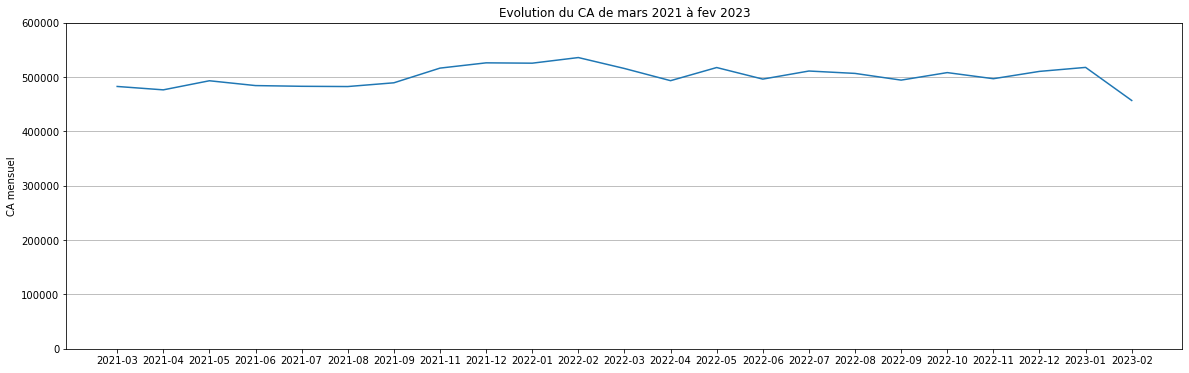

In [45]:
#pour obtenir le CA par mois, j'effectue une agregation
df_transacM = df_transac.groupby(df_transac['mois_session'])['price'].sum().reset_index(name='CA')
#le graphe d'évolution du CA
plt.figure(figsize=(20,6))
plt.plot(df_transacM['mois_session'],df_transacM['CA'] )
plt.yticks([0,100000,200000,300000,400000, 500000, 600000])
plt.grid(axis='y')
plt.ylabel('CA mensuel')
plt.title('Evolution du CA de mars 2021 à fev 2023')
plt.show()

==> le mois d'oct 2021 n'est plus visible sur le graphe car pas de CA.

Visualisons les CA mensuels en les comparant d'une année à l'autre

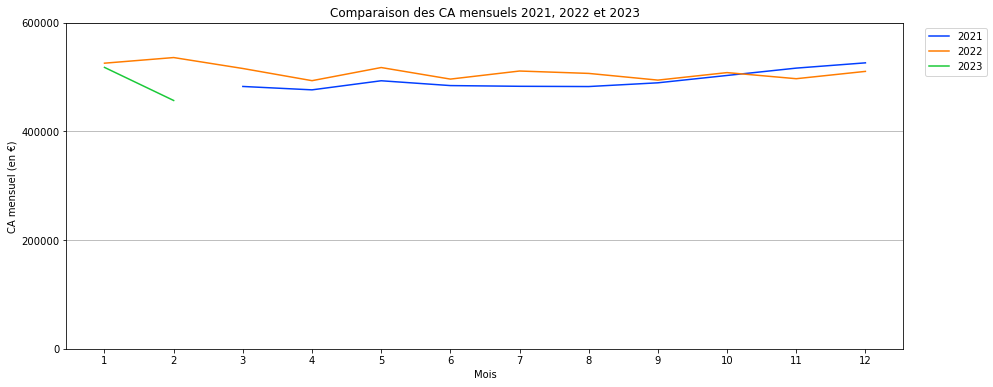

In [46]:
#'date_session' au format date
df_transacM['mois_session']= pd.to_datetime(df_transacM['mois_session'], format='%Y-%m')
#sur un même graphe annuel, comparaison des CA mensuels 2021, 2022, 2023
plt.figure(figsize=(15,6))
sns.lineplot(data=df_transacM, x=df_transacM['mois_session'].dt.month, y='CA', hue = df_transacM['mois_session'].dt.year, palette='bright', ci=None, estimator=sum)
plt.xlabel('Mois')
plt.ylabel('CA mensuel (en €)')
plt.yticks([0, 200000, 400000, 600000])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend(title ="", bbox_to_anchor=(1.02,1))
plt.title('Comparaison des CA mensuels 2021, 2022 et 2023')
plt.grid(axis='y')
plt.show()

On constate que 2022 est supérieur à 2021 mais passe dessous à partir d'octobre. De plus le petit bout de courbe de 2023 est très en dessous de 2022 à la même période de l'année.

Effectuons une décomposition en moyenne mobile pour évaluer une tendance globale:

In [47]:
#calcul de la moyenne mobile et choix de l'ordre
df_transacM = df_transacM.sort_values('mois_session')
df_transacM['moy_mobile']=df_transacM['CA'].rolling(7).mean()

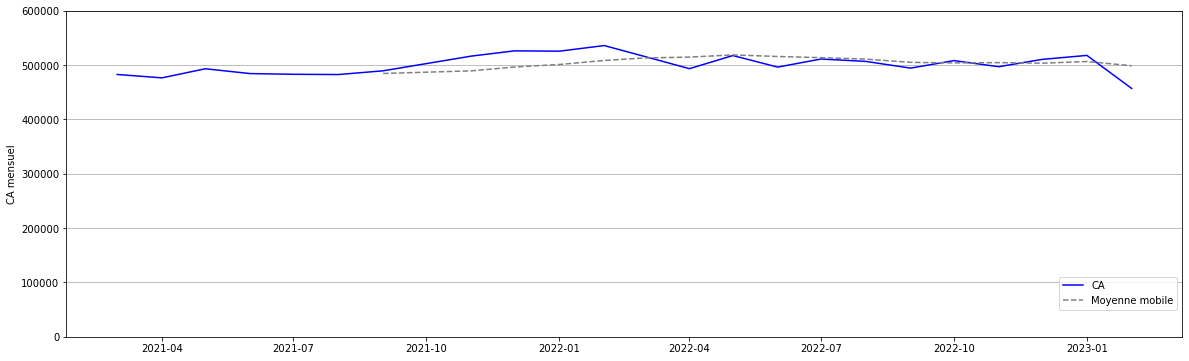

In [48]:
#affichage sur un seul graphe du CA réel et de la moyenne mobile
plt.figure(figsize=(20,6))
plt.plot(df_transacM['mois_session'],df_transacM['CA'] , color ='blue', label='CA')
plt.plot(df_transacM['mois_session'], df_transacM['moy_mobile'], color='grey', linestyle='--', label='Moyenne mobile')
plt.grid(axis='y')
plt.yticks([0,100000,200000,300000,400000, 500000, 600000])
plt.ylabel('CA mensuel')
plt.legend(title="", bbox_to_anchor=(1,0.2))
plt.show()

La courbe de la moyenne mobile indique une tendance du CA à la baisse depuis mai 2022.

# Partie 2: Zoom sur les références <a class="anchor" id="chapter3"></a>

Les tops, les flops, la répartition par catégorie.

Calcul du CA réalisé par produit:

In [49]:
#CA par produit, agrégation sur l'id_prod et somme des prix
df_references = df_transac.groupby(['id_prod'])['price'].sum().reset_index(name='CA')
df_references.head()

,id_prod,CA
0,0_0,4470.00
1,0_1,5154.31
2,0_10,323.10
3,0_100,61.80
4,0_1000,2783.88


In [50]:
#ajout du prix unitaire et catégorie par fusion
df_references_complet = pd.merge(df_references,products, on='id_prod', how='left' )
#calcul de la qté vendue
df_references_complet['qté']= df_references_complet['CA']//df_references_complet['price']
df_references_complet.head()

,id_prod,CA,price,categ,qté
0,0_0,4470.00,3.75,categ_0,1192.0
1,0_1,5154.31,10.99,categ_0,469.0
2,0_10,323.10,17.95,categ_0,17.0
3,0_100,61.80,20.60,categ_0,3.0
4,0_1000,2783.88,6.84,categ_0,407.0


## Les TOPS <a class="anchor" id="section_3_1"></a>

In [51]:
#liste des 10 produits les plus vendus en qté
print('les 10 produits tops en quantité vendue sont:')
df_references_complet.sort_values('qté', ascending = False).head(10)

les 10 produits tops en quantité vendue sont:


,id_prod,CA,price,categ,qté
2590,1_369,53593.66,23.99,categ_1,2233.0
2643,1_417,45527.31,20.99,categ_1,2169.0
2640,1_414,51496.63,23.83,categ_1,2161.0
2732,1_498,49474.29,23.37,categ_1,2116.0
2652,1_425,35322.21,16.99,categ_1,2079.0
2628,1_403,35044.52,17.99,categ_1,1947.0
2638,1_412,32234.40,16.65,categ_1,1936.0
2639,1_413,34702.71,17.99,categ_1,1929.0
2631,1_406,47808.87,24.81,categ_1,1926.0
2632,1_407,30700.80,15.99,categ_1,1919.0


==> Top 5 qui sort du lot avec plus de 2000 unités vendues en 2 ans

In [52]:
#liste des 10 produits qui réalisent les plus gros CA
print('les 10 produits tops en CA réalisé sont:')
df_references_complet.sort_values('CA', ascending=False).head(10)

les 10 produits tops en CA réalisé sont:


,id_prod,CA,price,categ,qté
3095,2_159,92265.68,145.99,categ_2,632.0
3069,2_135,67403.23,68.99,categ_2,977.0
3044,2_112,62772.53,67.57,categ_2,928.0
3033,2_102,58962.58,59.14,categ_2,997.0
3151,2_209,55292.10,69.99,categ_2,790.0
2618,1_395,53863.42,28.99,categ_1,1858.0
2590,1_369,53593.66,23.99,categ_1,2233.0
3042,2_110,51854.25,62.25,categ_2,833.0
2640,1_414,51496.63,23.83,categ_1,2161.0
3200,2_39,51089.19,57.99,categ_2,881.0


==> Top 3 avec CA réalisé supérieur à 600K€.

On note 2 références communes entre les 2 tableaux: 1_369 et 1_414.

## Les FLOPS <a class="anchor" id="section_3_2"></a>

In [53]:
#liste des 10 produits qui réalisent les moins gros CA
print('les 10 produits flops en CA réalisé sont:')
df_references_complet.sort_values('CA', ascending=True).head(10)

les 10 produits flops en CA réalisé sont:


,id_prod,CA,price,categ,qté
594,0_1539,0.99,0.99,categ_0,1.0
2178,0_898,1.27,1.27,categ_0,1.0
313,0_1284,1.38,1.38,categ_0,1.0
1896,0_643,1.98,0.99,categ_0,2.0
718,0_1653,1.98,0.99,categ_0,2.0
664,0_1601,1.99,1.99,categ_0,1.0
1783,0_541,1.99,1.99,categ_0,1.0
2078,0_807,1.99,1.99,categ_0,1.0
801,0_1728,2.27,2.27,categ_0,1.0
1543,0_324,2.36,1.18,categ_0,2.0


==> CA en effet très faible, surtout si on compare au CA réalisé par les Tops.

In [55]:
#nb de produits vendus qui font moins de 5€ de CA
nb_prod_flopCA = df_references_complet.loc[df_references_complet['CA']<5].shape[0]
prop_flopCA = round(nb_prod_flopCA/df_references_complet.shape[0]*100,2)
print('il y a', nb_prod_flopCA,'produits qui ont réalisé moins de 5€ de CA en 2 ans')
print('soit', prop_flopCA,'% des produits')

il y a 34 produits qui ont réalisé moins de 5€ de CA en 2 ans
soit 1.04 % des produits


In [54]:
#nb de produits vendus qu'une fois en 2 ans
nb_prod_flop = df_references_complet.loc[df_references_complet['qté']==1].shape[0]
prop_flop = round(nb_prod_flop/df_references_complet.shape[0]*100,2)
print('il y a', nb_prod_flop,'produits qui ont été vendus qu\'une fois')
print('soit', prop_flop,'% des produits')

il y a 21 produits qui ont été vendus qu'une fois
soit 0.64 % des produits


On peut s'interroger sur le fait de maintenir ces articles...

## La répartition des ventes par catégorie <a class="anchor" id="section_3_3"></a>

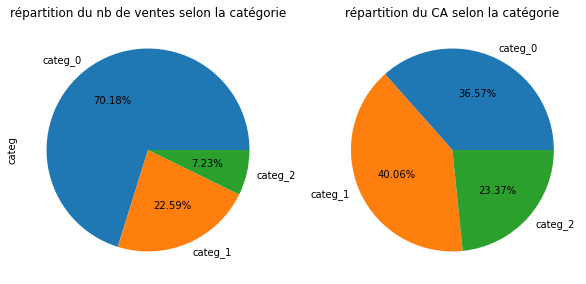

,categ,CA,CA_moyen
0,categ_0,4210506.19,1838.648991
1,categ_1,4613039.92,6259.212917
2,categ_2,2691255.82,11403.626356


In [110]:
plt.figure(1,figsize=(10,12)) #création de la fenêtre graphique
#Graphe 1 - répartition des ventes en qté selon leur catégorie
plt.subplot(1,2,1) # division de la fenêtre avec plt.subplot(nombre de lignes, nombre de colonnes, index)
df_references_complet['categ'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.title('répartition du nb de ventes selon la catégorie')

#Graphe 2 - répartition des ventes en CA selon leur catégorie
plt.subplot(1,2,2)#1 ligne, 2 colonnes, 2eme position
df_references_complet['CA_bis'] = df_references_complet['CA']
CA_categ = df_references_complet.groupby(['categ']).agg({'CA':'sum','CA_bis':'mean'}).reset_index()
CA_categ.rename(columns={'CA_bis': 'CA_moyen'}, inplace=True)
plt.pie(x= CA_categ['CA'], labels = CA_categ['categ'], autopct='%.2f%%')
plt.title('répartition du CA selon la catégorie')

plt.show()

CA_categ

On constate une majorité de vente de catégorie 0 en nb et une répartition bien plus équilibrée des 3 catégories en CA.

Le tableau affiche par catégorie le CA total réalisé sur les 2 ans, et le CA moyen par produit par catégorie. ==> on constate la catégorie a un CA produit moyen bien supérieur aux 2 autres. En effet, les articles de catégorie 2 ont des prix unitaires bien plus élevés.

# Partie 3: Les profils de nos clients <a class="anchor" id="chapter4"></a>

- Répartition par genre, 
- Répartition par tranche d'âge
- Répartition du CA via une Courbe de Lorenz

In [58]:
#travail sur le df customers, calcul de l'age à partir de l'année de naissance
customers['age']= dt.date.today().year - customers['birth']
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


In [59]:
#création d'un df des transactions par client
transac_client = df_transac.groupby(['client_id'])['price'].sum().reset_index(name='CA')
transac_client.head()

,client_id,CA
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1711.95


In [60]:
print('il y a',transac_client.shape[0],'clients qui ont effectués des transactions sur la période')
print('et il y a', customers.shape[0], 'dans notre fichier clients')

il y a 8598 clients qui ont effectués des transactions sur la période
et il y a 8623 dans notre fichier clients


Les répartitions se feront sur tous les clients qu'ils aient ou non effectué des transactions.

In [61]:
#création d'un df qui fusionne les données clients et CA en externe pour conserver toutes les données
transac_client_complet = pd.merge(transac_client, customers, on='client_id', how = 'outer')

In [62]:
transac_client_complet.shape[0]

8623

==> Nous avons bien conservé tous les clients même ceux qui n'ont pas effectué de transaction. On va remplacer les nan de CA par des zéros.

In [63]:
#remplace les nan par 0
transac_client_complet.loc[transac_client_complet['CA'].isna(), 'CA']= 0

## Répartition  par genre <a class="anchor" id="section_4_1"></a>

In [64]:
#répartition homme-femme en nb
# regroupement par sex et compte des clients
df_genre_nb = transac_client_complet.groupby(['sex'])['client_id'].count().reset_index(name='nb')
df_genre_nb.head()

,sex,nb
0,f,4491
1,m,4132


In [65]:
#répartition homme-femme en CA
#regroupement par sex et somme des CA
df_genre_CA = transac_client_complet.groupby(['sex'])['CA'].agg(['sum','mean','std'])
df_genre_CA = df_genre_CA.reset_index()

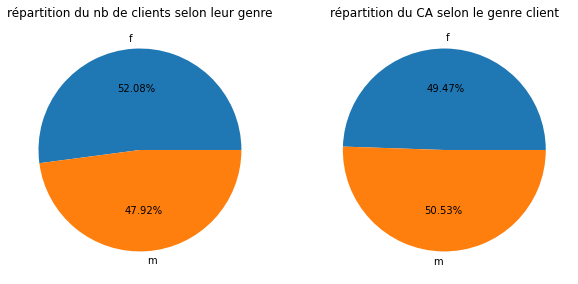

In [66]:
#Graphes répartition du nb et du CA selon genre
plt.figure(1,figsize=(10,12)) #création de la fenêtre graphique
#Graphe 1 - répartition du nb
plt.subplot(1,2,1) # division de la fenêtre avec plt.subplot(nombre de lignes, nombre de colonnes, index), 1 ligne, 2 colonnes, position 1
plt.pie(x= df_genre_nb['nb'], labels = df_genre_nb['sex'], autopct='%.2f%%')
plt.title('répartition du nb de clients selon leur genre')
#Graphe 2 - répartition du CA
plt.subplot(1,2,2)#1 ligne, 2 colonnes, 2eme position
plt.pie(x= df_genre_CA['sum'], labels = df_genre_CA['sex'], autopct='%.2f%%')
plt.title('répartition du CA selon le genre client')

plt.show()

La répartition selon le genre en nb et en CA est très équilibrée. Les femmes sont plus nbreuses mais réalisent un peu moins de CA.

Regardons le CA moyen et l'écart-type par genre:

In [67]:
df_genre_CA.head()

,sex,sum,mean,std
0,f,5.697808e+06,1268.716962,2399.316878
1,m,5.820729e+06,1408.695396,6807.099818


Vérifions l'intervalle de confiance de la moyenne.

In [68]:
import scipy, math
alpha = 0.05 #test 5%
xbar= transac_client_complet['CA'].mean()
n = len(transac_client_complet) #longueur échantillon
sprime = transac_client_complet['CA'].std()
icinf=xbar-scipy.stats.t.ppf(1-alpha/2,n-1)*sprime/math.sqrt(n)
icsup=xbar+scipy.stats.t.ppf(1-alpha/2,n-1)*sprime/math.sqrt(n)
print('l\'intervalle de confiance de la moyenne est donc [',round(icinf,2),',',round(icsup,2),']')

l'intervalle de confiance de la moyenne est donc [ 1229.82 , 1441.77 ]


Le CA moyen pour un homme est dans l'intervalle de confiance, idem pour les femmes.

==> le genre n'est pas un critère d'analyse pour le CA moyen et le nb de vente.

## Répartition  par tranche d'âge <a class="anchor" id="section_4_2"></a>

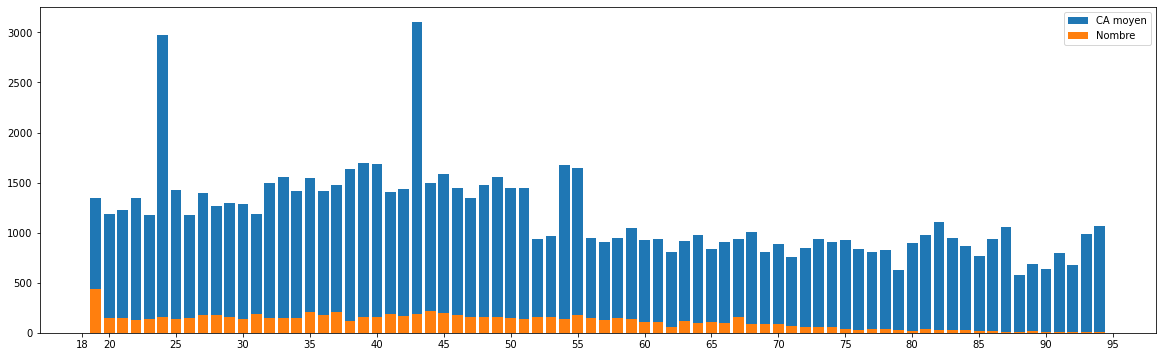

In [69]:
df_age = transac_client_complet.groupby(['age']).agg({'CA':'mean', 'client_id':'count'})
df_age = df_age.reset_index()
df_age.rename(columns={'client_id': 'Nb'}, inplace=True)
df_age.rename(columns={'CA': 'CA_moyen'}, inplace=True)
#graphe de répartition selon age du CA moyen et du nb
plt.figure(figsize=(20,6))
plt.bar(df_age['age'], df_age['CA_moyen'], label ='CA moyen')
plt.bar(df_age['age'], df_age['Nb'], label ='Nombre')
plt.xticks([18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95 ])
plt.legend()
plt.show()

en Nb: l'âge 19 ans (18 ans en 2022) a un effectif de plus du double des autres, suspect!

en CA moyen: 23 et 42 sortent du lot; et 53 et 54 idem pour leur tranche.

les tranches retenues: 18-24; 25-34; 35-44; 45-54; 55-64; 65-74; 75 et +.

In [70]:
#nb de clients de 19ans? liste?
nb_19 = transac_client_complet.loc[transac_client_complet['age']==19].shape[0]
nb_19_0CA = transac_client_complet.loc[(transac_client_complet['age']==19)&(transac_client_complet['CA']==0)].shape[0]
print(nb_19,'clients de 19 ans dont',nb_19_0CA,'sans achat')

440 clients de 19 ans dont 3 sans achat


Hypothèse: clients de moins de 18 ans qui ont saisi une date de naissance erronée pour créer leur fiche. 

In [71]:
#création d'une nouvelle colonne tranche_age
transac_client_complet['tranche_age'] = '18-24'
transac_client_complet['tranche_age'].loc[(transac_client_complet['age']>24)&(transac_client_complet['age']<35)] = '25-34'
transac_client_complet['tranche_age'].loc[(transac_client_complet['age']>34)&(transac_client_complet['age']<45)] = '35-44'
transac_client_complet['tranche_age'].loc[(transac_client_complet['age']>44)&(transac_client_complet['age']<55)] = '45-54'
transac_client_complet['tranche_age'].loc[(transac_client_complet['age']>54)&(transac_client_complet['age']<65)] = '55-64'
transac_client_complet['tranche_age'].loc[(transac_client_complet['age']>64)&(transac_client_complet['age']<75)] = '65-74'
transac_client_complet['tranche_age'].loc[(transac_client_complet['age']>75)] = '75+'

C:\Users\sofle\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
#calcul du CA moyen et du nb de clients par tranche d'age
df_tranche = transac_client_complet.groupby(['tranche_age']).agg({'CA':'mean', 'client_id':'count'})
df_tranche = df_tranche.reset_index()
df_tranche.rename(columns={'client_id': 'Nb'}, inplace=True)
df_tranche.rename(columns={'CA': 'CA_moyen'}, inplace=True)

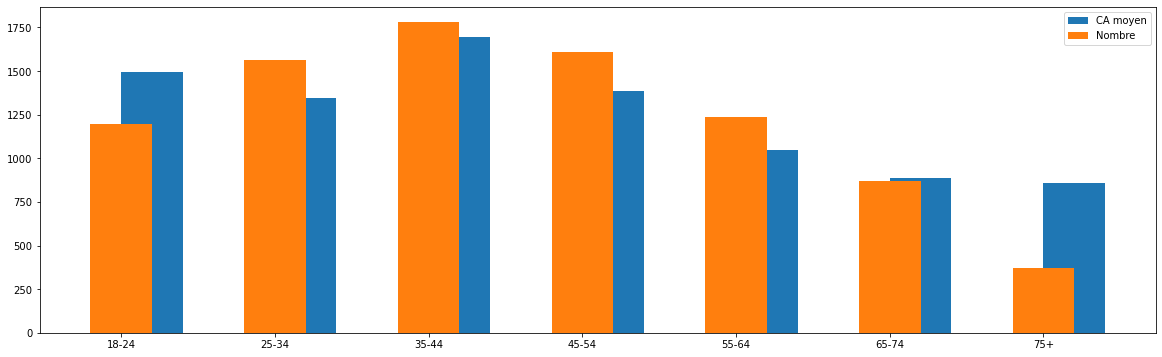

In [73]:
#graphe de répartition selon age du CA moyen et du nb
plt.figure(figsize=(20,6))
plt.bar(df_tranche['tranche_age'], df_tranche['CA_moyen'], label ='CA moyen', align='edge', width=0.4)
plt.bar(df_tranche['tranche_age'], df_tranche['Nb'], label ='Nombre', width=0.4)
#plt.plot(df_tranche['tranche_age'], df_tranche ['std'], label='Ecart-type', color='black')
plt.legend()
plt.show()

- la tranche 35-44 est la plus nombreuse et celle qui réalise le plus de CA.
- la tranche 75 et + est la moins nombreuse et réalise pourtant un important CA.

## Répartition du CA: courbe de Lorenz <a class="anchor" id="section_4_3"></a>

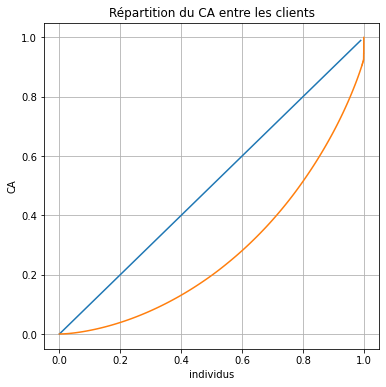

l'indice de Gini est  0.44900367830391663


In [74]:
#construction de la courbe de Lorenz
CA_client = transac_client_complet['CA'].values #les valeurs de CA
n = len(CA_client)
lorenz = np.cumsum(np.sort(CA_client)) / CA_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
plt.figure(figsize=(6,6))
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

# Diagonale
a = np.arange(0,1,.01)
x = a
y = a
    
# Graphique
sns.lineplot(x=x,y=y)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.grid()
plt.xlabel('individus')
plt.ylabel('CA')
plt.title('Répartition du CA entre les clients')
plt.show()

#calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print ('l\'indice de Gini est ', gini)

On constate une inégalité du CA entre tous les clients, 
- la courbe finit à la vertical ==> doit avoir de gros clients
- 50% du CA est fait par 80% des clients

==> confirmé par le calcul de l'indice de GINI. Celui-ci est compris entre 0 et 1, 0 étant égalitaire et 1 pas du tout.

In [75]:
#liste des GROS clients
transac_client_complet.sort_values('CA',ascending=False).head(5)

,client_id,CA,sex,birth,age,tranche_age
677,c_1609,312247.610000,m,1980,43,35-44
4387,c_4958,282289.700000,m,1999,24,18-24
6336,c_6714,149589.218641,f,1968,55,55-64
2723,c_3454,111691.204320,m,1969,54,45-54
2108,c_2899,5214.050000,f,1994,29,25-34


On voit les 4 gros clients qui sortent du lot par rapport au 5ème. On avait en effet identifié dans le diagramme des ages que les 4 ages 42, 23, 54, 53 généraient les plus importants CA.

In [76]:
#calcul du CA réalisé par ces 4 gros clients
clients_pro=['c_1609', 'c_4958','c_6714','c_3454']
transac_pro = transac_client_complet.loc[transac_client_complet['client_id'].isin(clients_pro)]
CA_pro=transac_pro['CA'].sum()
CA_Total=transac_client_complet['CA'].sum()
print('Le CA réalisé par les 4 gros clients est de', round(CA_pro,2),'€, soit', round(CA_pro*100/CA_Total,2),'% du CA total.')

Le CA réalisé par les 4 gros clients est de 855817.73 €, soit 7.43 % du CA total.


On peut émettre l'hypothèse que ces 4 gros clients sont des clients professionnels.

__ERRATUM__: ces 4 clients sont des outliers, je devrais les exclure de mon analyse pour la partie 4.

# Partie 4: Analyse des comportements clients <a class="anchor" id="chapter5"></a>

In [77]:
#construction d'un df complet à partir des df_transac et customers
df_complet = pd.merge(df_transac, customers, on='client_id', how='left' )
df_complet.shape

(656415, 12)

In [78]:
df_transac.shape

(656415, 9)

==> pour chaque transaction, nous avons les données client de l'acheteur

## lien entre le genre d’un client et les catégories des livres achetés <a class="anchor" id="section_5_1"></a>

Analyse de 2 variables qualitatives, visualisation par une heatmap.

In [79]:
#pour chaque genre, par catégorie (colonnes), calcul du nb de produits
table_genre_categ=df_complet.pivot_table(index='sex', columns='categ', values ='id_prod', aggfunc='count',margins=True, margins_name='Total')
#table_genre_categ = table_genre_categ.reset_index()
table_genre_categ.head()

categ,categ_0,categ_1,categ_2,Total
sex,,,,
f,196643,113927,16712,327282
m,199318,111234,18581,329133
Total,395961,225161,35293,656415


1/ Affichage du tableau de contingence en heatmap.

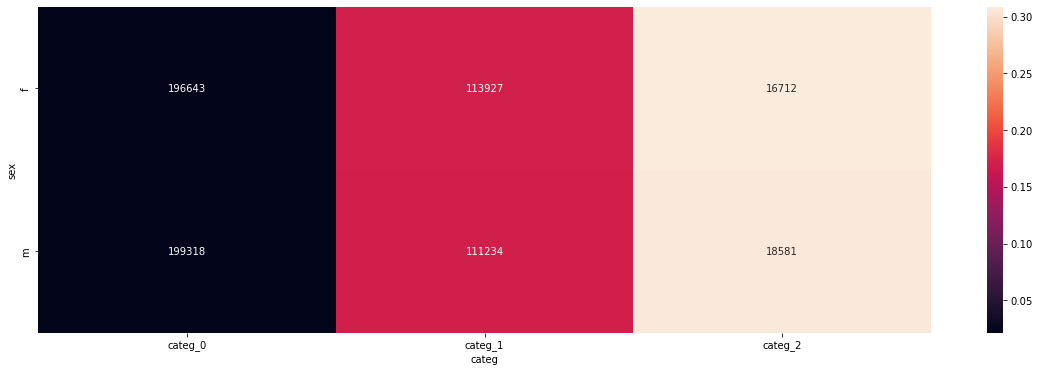

In [80]:
tx = table_genre_categ.loc[:,["Total"]]
ty = table_genre_categ.loc[["Total"],:]
n = len(df_complet)
indep = tx.dot(ty) / n
c = table_genre_categ.fillna(0) # On remplace les valeurs nulles par 0

measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = (measure/xi_n)
plt.figure(figsize=(20,6))
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
plt.show()

==> D'après les codes couleurs, les catégories de livres achetés semblent ne pas avoir de corrélation avec le genre de l'acheteur. D'après le nb d'occurences, la categ2 semble être dépendante du genre.

2/ Vérifions par le Chi2, les hypothèses sont:
- H0: le nb de catégories de livre achetés est égal quelque soit le genre de l'acheteur. La catégorie et le genre sont indépendants.
- H1: les catégories de livre achetés sont dépendantes du genre de l'acheteur.

In [81]:
#calcul du Chi2: déjà calculé dans le code du heatmap xi_n
print('le Chi2 calculé est de ', xi_n)

le Chi2 calculé est de  144.0383194139693


In [82]:
#calcul Chi2, p-value et V de Cramer pour 'force du lien' par la librairie researchpy
import researchpy as rp
rp.crosstab(df_complet['sex'], df_complet['categ'], test= "chi-square")

(        categ                        
 categ categ_0 categ_1 categ_2     All
 sex                                  
 f      196643  113927   16712  327282
 m      199318  111234   18581  329133
 All    395961  225161   35293  656415,
                 Chi-square test   results
 0  Pearson Chi-square ( 2.0) =   144.0383
 1                    p-value =     0.0000
 2                 Cramer's V =     0.0148)

La p-value étant de 1.407e-28 donc inférieur à 0,05. L'hypothèse nulle est rejetée. ==> le genre de l'acheteur et la catégorie de livres achetés ne sont pas indépendants.

Le V de Cramer <0,10 le lien est très faible.

cf tableau valeur du V de Cramer et intensité des relations:
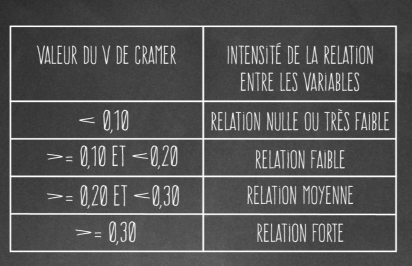

## Lien entre âge et montant total des achats <a class="anchor" id="section_5_2"></a>

Analyse de corrélation quanti/quanti: visualisation du graphe nuage de points.

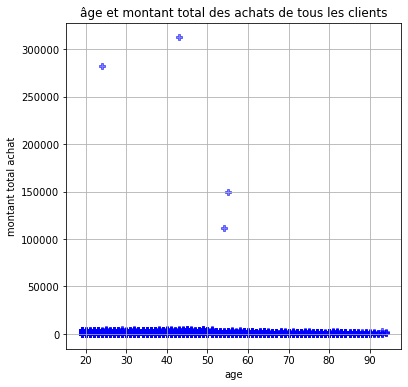

In [83]:
plt.figure(figsize=(6,6))
plt.scatter(transac_client_complet['age'], transac_client_complet['CA'], alpha=0.5, c='blue', marker='P')
plt.grid()
plt.xlabel('age')
plt.ylabel('montant total achat')
plt.title('âge et montant total des achats de tous les clients')
plt.show()

A cause des 4 gros clients, les achats des autres clients ne sont pas visibles. Nous allons donc "exclure" ces 4 gros clients.

In [84]:
#Construisons df sans les 4 PRO
transac_client_particulier=transac_client_complet.loc[transac_client_complet['CA']<10000]

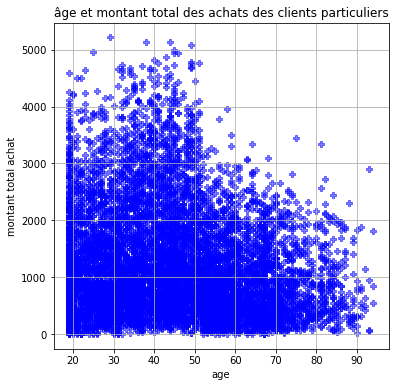

In [111]:
#nuage de points des clients particuliers
plt.figure(figsize=(6,6))
plt.scatter(transac_client_particulier['age'], transac_client_particulier['CA'], alpha=0.5, c='blue', marker='P')
plt.grid()
plt.xlabel('age')
plt.ylabel('montant total achat')
plt.title('âge et montant total des achats des clients particuliers')
plt.show()

Vérifions la corrélation linéaire par le coeficient de Pearson, les hypothèses sont:
- H0: l'âge et le montant total des achats sont indépendants
- H1: il y a une corrélation linéaire entre l'âge et le montant total des achats.

In [86]:
#Calcul du coeficient de pearson et la p-value
coef_pearson,p_value = st.pearsonr(transac_client_particulier["age"],transac_client_particulier["CA"])
print('le coeficient de pearson est',coef_pearson)
print('la p-value est',p_value)

le coeficient de pearson est -0.18155584205700445
la p-value est 9.041749089101901e-65


Pour mémoire, les coefficients de corrélation varient entre -1 et 1. Une valeur positive indique une corrélation positive. Une valeur négative reflète une corrélation négative. Une valeur proche de zéro reflète l’absence d'une corrélation linéaire.

- Ici, le coef de pearson est proche de 0 : pas de corrélation linéaire.
- la p-value étant inférieure à 0,05, H0 est rejetée.

==> pas de corrélation linéaire entre l'âge et le montant total du panier. Mais ils ne sont pas indépendants

## lien entre l’âge des clients et la fréquence d’achat <a class="anchor" id="section_5_3"></a>

Analyse de deux variables quantitative, visualisation par un graphe nuage de points.

In [87]:
df_complet.head()

,id_prod,session_id,client_id,date_session,price,categ,mois_session,semaine_session,jour_session,sex,birth,age
0,0_1518,s_211425,c_103,2022-05-20 13:21:29.043970,4.18,categ_0,2022-05,2022-20,2022-05-20,f,1986,37
1,1_251,s_158752,c_8534,2022-02-02 07:55:19.149409,15.99,categ_1,2022-02,2022-05,2022-02-02,m,1988,35
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33.155329,7.99,categ_0,2022-06,2022-24,2022-06-18,f,1968,55
3,2_209,s_52962,c_6941,2021-06-24 04:19:29.835891,69.99,categ_2,2021-06,2021-25,2021-06-24,m,2000,23
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08.194479,4.99,categ_0,2023-01,2023-02,2023-01-11,m,1980,43


In [88]:
#calcul de la fréquence d'achat, et du panier (pour la suite)
#groupement sur la session, conservation des colonnes données client et somme des prix des produits pour obtenir le panier
df_session = df_complet.groupby(['session_id', 'client_id', 'jour_session', 'sex', 'age'])\
    .agg({'price':'sum','id_prod':'count'}).reset_index()
df_session.rename(columns={'price': 'panier'}, inplace=True)
df_session.rename(columns={'id_prod': 'nb_prod'}, inplace=True)
df_session.head()

,session_id,client_id,jour_session,sex,age,panier,nb_prod
0,s_1,c_329,2021-03-01,f,56,11.99,1
1,s_10,c_2218,2021-03-01,f,53,26.99,1
2,s_100,c_3854,2021-03-01,f,45,33.72,2
3,s_1000,c_1014,2021-03-03,m,34,39.22,4
4,s_10000,c_476,2021-03-22,f,34,41.49,3


In [89]:
#groupement sur client_id, conservation de la colonne age,et compte du nb de session pour obtenir le nb d'achats
df_age_freq = df_session.groupby(['client_id', 'age']).agg({'panier':'mean' ,'session_id':'count'}).reset_index()
#renommage des colonnes
df_age_freq.rename(columns={'panier': 'panier_moyen'}, inplace=True)
df_age_freq.rename(columns={'session_id': 'nb_achats'}, inplace=True)
df_age_freq.head()

,client_id,age,panier_moyen,nb_achats
0,c_1,68,17.193438,32
1,c_10,67,39.811765,34
2,c_100,31,50.970000,5
3,c_1000,57,24.020870,92
4,c_1001,41,39.812791,43


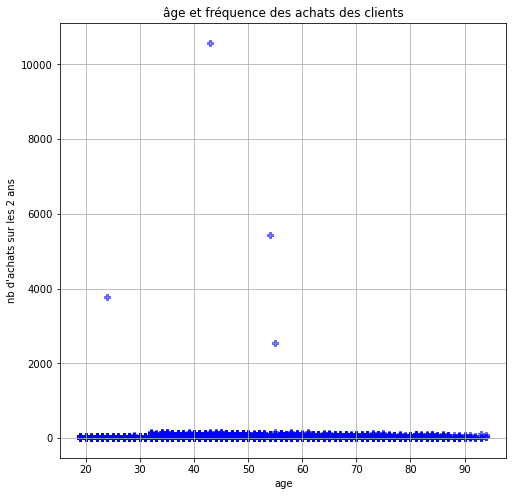

In [112]:
#nuage de points age/fréquence
plt.figure(figsize=(8,8))
plt.scatter(df_age_freq['age'], df_age_freq['nb_achats'], alpha=0.5, c='blue', marker='P')
plt.grid()
plt.xlabel('age')
plt.ylabel('nb d\'achats sur les 2 ans')
plt.title('âge et fréquence des achats des clients')
plt.show()

Les 4 gros clients faussent le visuel, je les exclus pour cette analyse de corrélation.

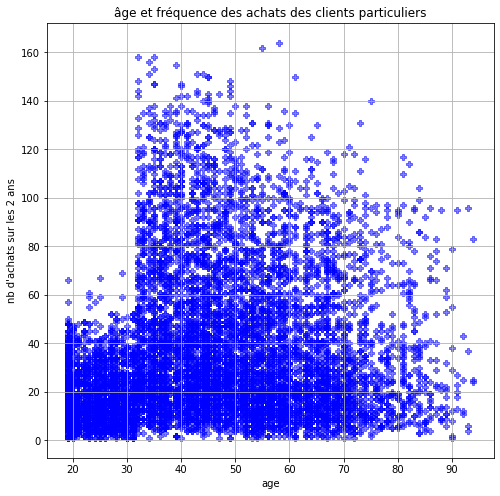

In [113]:
#on refait sans les 4 pro
df_age_freq_parti = df_age_freq[~df_age_freq['client_id'].isin(clients_pro)]
#nuage de points age/fréquence
plt.figure(figsize=(8,8))
plt.scatter(df_age_freq_parti['age'], df_age_freq_parti['nb_achats'], alpha=0.5, c='blue', marker='P')
plt.grid()
plt.xlabel('age')
plt.ylabel('nb d\'achats sur les 2 ans')
plt.title('âge et fréquence des achats des clients particuliers')
plt.show()

Posons nos hypothèses:
- H0: la fréquence d'achats et l'âge de l'acheteur sont indépendants
- H1: il y a un lien entre les 2.

1/ Vérifions tout d'abord s'il y a une corrélation linéaire par le coeficient de Pearson:

In [92]:
#Calcul du coeficient de pearson et de la covariance
print('le coeficient de pearson est',st.pearsonr(df_age_freq_parti["age"],df_age_freq_parti["nb_achats"])[0])
print('la p-value est',st.pearsonr(df_age_freq_parti["age"],df_age_freq_parti["nb_achats"])[1])

le coeficient de pearson est 0.16597463491296205
la p-value est 3.940527614459324e-54


- Le coeficient de Pearson étant proche de zéro, pas de corrélation linéaire entre l'age et la fréquence d'achat; 
- p-value < 0,05, H0 est rejetée donc pas indépendants toutefois.

2/ Vérifions si la distribution du nb d'achats suit une loi normale par le test de Shapiro:

- H0: le nb d'achats suit un loi normale
- H1: le nb d'achats ne suit pas une loi normale.

In [93]:
#Test de normalité de la distribution du nb d'achats
st.shapiro(df_age_freq_parti["nb_achats"])

C:\Users\sofle\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8581281304359436, pvalue=0.0)

la p-value étant inférieure à 0,05, H0 est rejetée, le nb d'achats ne suit pas une loi normale.

Vérifions la corrélation par le test de Kruskal:

In [94]:
#Test de Krsukal
st.kruskal(df_age_freq_parti["age"],df_age_freq_parti["nb_achats"])

KruskalResult(statistic=1638.586304699971, pvalue=0.0)

la p-value étant inférieure à 0,05, H0 est rejetée. ==> l'âge et le nb d'achats ont une corrélation.

## Lien entre l'âge et le montant du panier moyen <a class="anchor" id="section_5_4"></a>

Analyse de 2 variables quantitatives, visualisation par un graphe nuage de points.

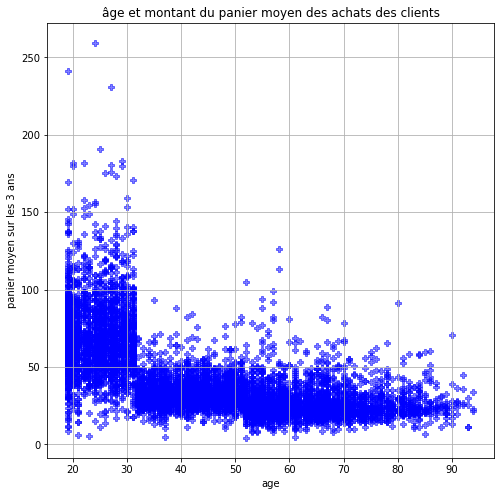

In [95]:
#nuage de points age/panier moyen
plt.figure(figsize=(8,8))
plt.scatter(df_age_freq['age'], df_age_freq['panier_moyen'], alpha=0.5, c='blue', marker='P')
plt.grid()
plt.xlabel('age')
plt.ylabel('panier moyen sur les 3 ans')
plt.title('âge et montant du panier moyen des achats des clients')
plt.show()

Les paniers moyens au dessus de 150€ sont tous dépensés par des clients de 32 et moins.
Posons nos hypothèses:
- H0: age et montant moyen du panier sont indépendants
- H1: corrélation entre l'age et le montant moyen du panier.

1/ Recherche de corrélation linéaire par le calcul du coeficient de Pearson:

In [96]:
#Calcul du coeficient de pearson et de la covariance
print('le coeficient de pearson est',st.pearsonr(df_age_freq["age"],df_age_freq["panier_moyen"])[0])
print('la p-value est',st.pearsonr(df_age_freq["age"],df_age_freq["panier_moyen"])[1])

le coeficient de pearson est -0.6082419183758275
la p-value est 0.0


Pas de corrélation linéaire, mais H0 rejetée. Le signe du coef de corrélation étant négatif, on peut indiquer que la tendance est que plus le client est agé moins le montant du panier moyen est élevé.

2/ Test d'adéquation à une loi normale de Kolmogorov Smirnov:
- H0: l'âge et le panier moyen suivent une loi normale
- H1: ils ne suivent pas une loi normale

In [97]:
#test Kolmogorov-Smirnov
st.ks_2samp(df_age_freq["age"],df_age_freq["panier_moyen"])

KstestResult(statistic=0.2711095603628751, pvalue=2.496987448607163e-278)

La p-value est <0,05, l'âge et le panier moyen ne suivent pas une loi normale.

3/ Vérifions par le test de Spearman, qui est non-paramétrique:
- H0: l'âge et le montant moyen du panier sont indépendants
- H1: ils sont dépendants.

In [98]:
#test de Spearman:
st.spearmanr(df_age_freq["age"],df_age_freq["panier_moyen"])

SpearmanrResult(correlation=-0.6940482786986172, pvalue=0.0)

La p-value est <0,05, cela confirme le rejet de H0.

==> il y a une corrélation entre l'âge et le montant moyen du panier.

_POUR ALLER PLUS LOIN..._

In [99]:
#affichage des 5 clients avec le montant de panier moyen le plus élevé
df_age_freq.sort_values('panier_moyen', ascending = False).head(5)

,client_id,age,panier_moyen,nb_achats
1521,c_2369,24,259.4225,4
7695,c_7941,19,241.1600,2
5435,c_5903,27,230.8820,5
2409,c_317,25,190.9775,8
7299,c_7585,29,183.0725,4


On remarque qu'on ne retrouve pas les clients identifiés comme PRO.

Regardons le lien entre l'âge et le panier moyen en taille (nb d'articles)...

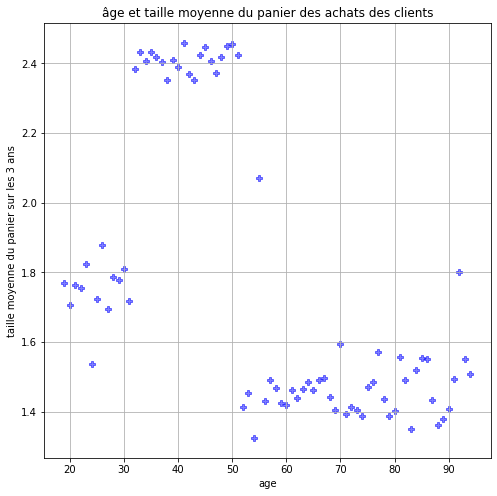

In [109]:
df_session_taille = df_complet.groupby(['session_id','age'])['id_prod'].count().reset_index(name='nb_articles')
df_age_taille = df_session_taille.groupby('age')['nb_articles'].mean().reset_index(name='taille_moyen_panier')
#Graphe age/taille moyenne du panier
plt.figure(figsize=(8,8))
plt.scatter(df_age_taille['age'], df_age_taille['taille_moyen_panier'], alpha=0.5, c='blue', marker='P')
plt.grid()
plt.xlabel('age')
plt.ylabel('taille moyenne du panier sur les 3 ans')
plt.title('âge et taille moyenne du panier des achats des clients')
plt.show()

En regardant la taille moyenne du panier par age, on constate des regroupements significatifs:
- la tranche 18-32 achète avec un panier de taille moyenne entre 1,5 et 2 articles
- la tranche 32-52: environ 2,4 articles en moyenne.
- la tranche plus de 50 ans entre 1,2 et 1,6 articles en moyenne.

## Lien entre l'âge et les catégories de livres achetés <a class="anchor" id="section_5_5"></a>

Analyse d'une variable quantitative et d'une variable qualitative. Visualisation par un boxplot.

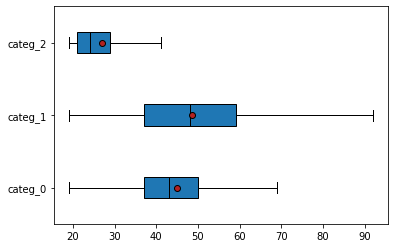

In [114]:
X = "categ" # qualitative
Y = "age" # quantitative
sous_echantillon = df_complet.copy() # on utilise comme sous-échantillon, les données complètes
#Affichage du graphique
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Selon le graphe, on visualise que la catégorie 2 est achetée uniquement par les moins de 40 ans; et que la catégorie 0 par les moins de 70 ans ==> il semble exister un lien entre l'age et la catégorie de livres achetés. Nous sommes dans le cas d'une variable qualitative et d'une variable quantitative, nous allons donc faire le test d'ANOVA.

Le test ANOVA consiste à vérifier l'égalité des moyennes,
- soit H0, les moyennes  des ages sont égales quelque soit la catégorie.
- H1, les moyennes ne sont pas égales, il y a donc un lien entre la catégorie et l'age.

Ce test applicable uniquement dans les conditions où:
- variances égales
- indépendance entre les echantillons.

Les données âge et catégorie ont été collectées de façon indépendante, 2 fichiers produit et client. Vérifions l'égalité des variances:

In [115]:
#test de Levene, égalité des variances
import pingouin as pg
pg.homoscedasticity(df_complet, dv="age", group="categ")

,W,pval,equal_var
levene,25476.523529,0.0,False


Selon le test de Levene, les variances ne sont pas égales. Nous devons faire le test Welch-Anova.

In [116]:
#test welch ANOVA
pg.welch_anova(dv='age', between='categ', data=df_complet)

,Source,ddof1,ddof2,F,p-unc,np2
0,categ,2,99389.297822,64895.773768,0.0,0.118973


la p-value est inférieur à 0,05; les moyennes ne sont pas égales. Cela confirme une corrélation entre la catégorie et l'age de l'acheteur

# Conclusion

* Le CA mensuel a une tendance à la baisse depuis mai 2022
* Des articles 'best-seller' et d'autres dont il faut s'interroger sur la continuité
* 3 tranches d'âge avec fort impact sur les ventes.
* En effet, l'âge est corrélé au volume CA, à la fréquence d'achats, au panier moyen (en nb et CA), et à la catégorie achetée. 

**==> le critère d'âge pourra être un critère cible pour le marketing.**